# Data Examination

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import missingno as msno
from pandas.api.types import is_object_dtype, is_numeric_dtype, is_bool_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import joblib
import plotly.express as px

In [ ]:
df = pd.read_csv("dataset.csv", on_bad_lines='skip', delimiter=";")
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 99976 non-null  object 
 1   default                              89976 non-null  float64
 2   account_amount_added_12_24m          99976 non-null  int64  
 3   account_days_in_dc_12_24m            88140 non-null  float64
 4   account_days_in_rem_12_24m           88140 non-null  float64
 5   account_days_in_term_12_24m          88140 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   account_status                       45603 non-null  float64
 8   account_worst_status_0_3m            45603 non-null  float64
 9   account_worst_status_12_24m          33215 non-null  float64
 10  account_worst_status_3_6m            42274 non-null  float64
 11  account_worst_status_6_12m  

In [ ]:
data.shape

(99976, 43)

In [ ]:
data.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [ ]:
num_columns = ["account_amount_added_12_24m","account_days_in_dc_12_24m","account_days_in_rem_12_24m","account_days_in_term_12_24m",
               "account_incoming_debt_vs_paid_0_24m","age","avg_payment_span_0_12m","avg_payment_span_0_3m","max_paid_inv_0_12m","max_paid_inv_0_24m",
              "num_active_div_by_paid_inv_0_12m","num_active_inv","num_arch_dc_0_12m","num_arch_dc_12_24m","num_arch_ok_0_12m","num_arch_ok_12_24m",
              "num_arch_rem_0_12m","num_arch_written_off_0_12m","num_arch_written_off_12_24m","num_unpaid_bills","recovery_debt","sum_capital_paid_account_0_12m",
              "sum_capital_paid_account_12_24m","sum_paid_inv_0_12m","time_hours"]

cat_columns = ["default","account_status","account_worst_status_0_3m","account_worst_status_12_24m","account_worst_status_3_6m","account_worst_status_6_12m",
              "merchant_category","merchant_group","name_in_email","status_last_archived_0_24m","status_2nd_last_archived_0_24m","status_3rd_last_archived_0_24m",
              "status_max_archived_0_6_months","status_max_archived_0_12_months","status_max_archived_0_24_months","worst_status_active_inv"]

bool_columns = ["has_paid"]

In [ ]:
data[cat_columns] = data[cat_columns].astype('category')

In [ ]:
for col in cat_columns:

    print("Column Name: ",'\033[1m' , col, '\033[0m')
    print(data[col].value_counts(), "\n")

Column Name:   default 
0.0    88688
1.0     1288
Name: default, dtype: int64 

Column Name:   account_status 
1.0    43693
2.0     1900
3.0        7
4.0        3
Name: account_status, dtype: int64 

Column Name:   account_worst_status_0_3m 
1.0    38375
2.0     6678
3.0      443
4.0      107
Name: account_worst_status_0_3m, dtype: int64 

Column Name:   account_worst_status_12_24m 
1.0    23527
2.0     8433
3.0      993
4.0      262
Name: account_worst_status_12_24m, dtype: int64 

Column Name:   account_worst_status_3_6m 
1.0    35254
2.0     6357
3.0      513
4.0      150
Name: account_worst_status_3_6m, dtype: int64 

Column Name:   account_worst_status_6_12m 
1.0    30703
2.0     8025
3.0      688
4.0      210
Name: account_worst_status_6_12m, dtype: int64 

Column Name:   merchant_category 
Diversified entertainment                                  38614
Youthful Shoes & Clothing                                  11755
Books & Magazines                                           93

In [ ]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
account_amount_added_12_24m,99976.0,12255.149516,35481.483737,0.000000,0.000000,0.000000,4937.250000,1.128775e+06
account_days_in_dc_12_24m,88140.0,0.223043,5.808117,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_rem_12_24m,88140.0,5.044622,22.863971,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_term_12_24m,88140.0,0.286896,2.929910,0.000000,0.000000,0.000000,0.000000,9.700000e+01
account_incoming_debt_vs_paid_0_24m,40661.0,1.331292,26.482299,0.000000,0.000000,0.152082,0.662952,3.914000e+03
age,99976.0,36.016284,13.001306,18.000000,25.000000,34.000000,45.000000,1.000000e+02
avg_payment_span_0_12m,76140.0,17.971473,12.751066,0.000000,10.800000,14.909091,21.000000,2.600000e+02
avg_payment_span_0_3m,50671.0,14.989786,10.297420,0.000000,8.400000,13.000000,18.285714,8.700000e+01
max_paid_inv_0_12m,99976.0,9203.654217,13512.167229,0.000000,2000.000000,6052.000000,11380.000000,2.790000e+05
max_paid_inv_0_24m,99976.0,11215.120819,15256.414937,0.000000,3350.000000,7580.000000,13783.000000,5.385000e+05


Missing Value Examination

In [ ]:
data.isnull().sum()

uuid                                       0
default                                10000
account_amount_added_12_24m                0
account_days_in_dc_12_24m              11836
account_days_in_rem_12_24m             11836
account_days_in_term_12_24m            11836
account_incoming_debt_vs_paid_0_24m    59315
account_status                         54373
account_worst_status_0_3m              54373
account_worst_status_12_24m            66761
account_worst_status_3_6m              57702
account_worst_status_6_12m             60350
age                                        0
avg_payment_span_0_12m                 23836
avg_payment_span_0_3m                  49305
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
num_active_div_by_paid_inv_0_12m       22939
num_active

# Missing Value Examination

Missing values can be seen in the matrix. When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right. When a row has a value in each column, the line will be at the maximum right position.

<Axes: >

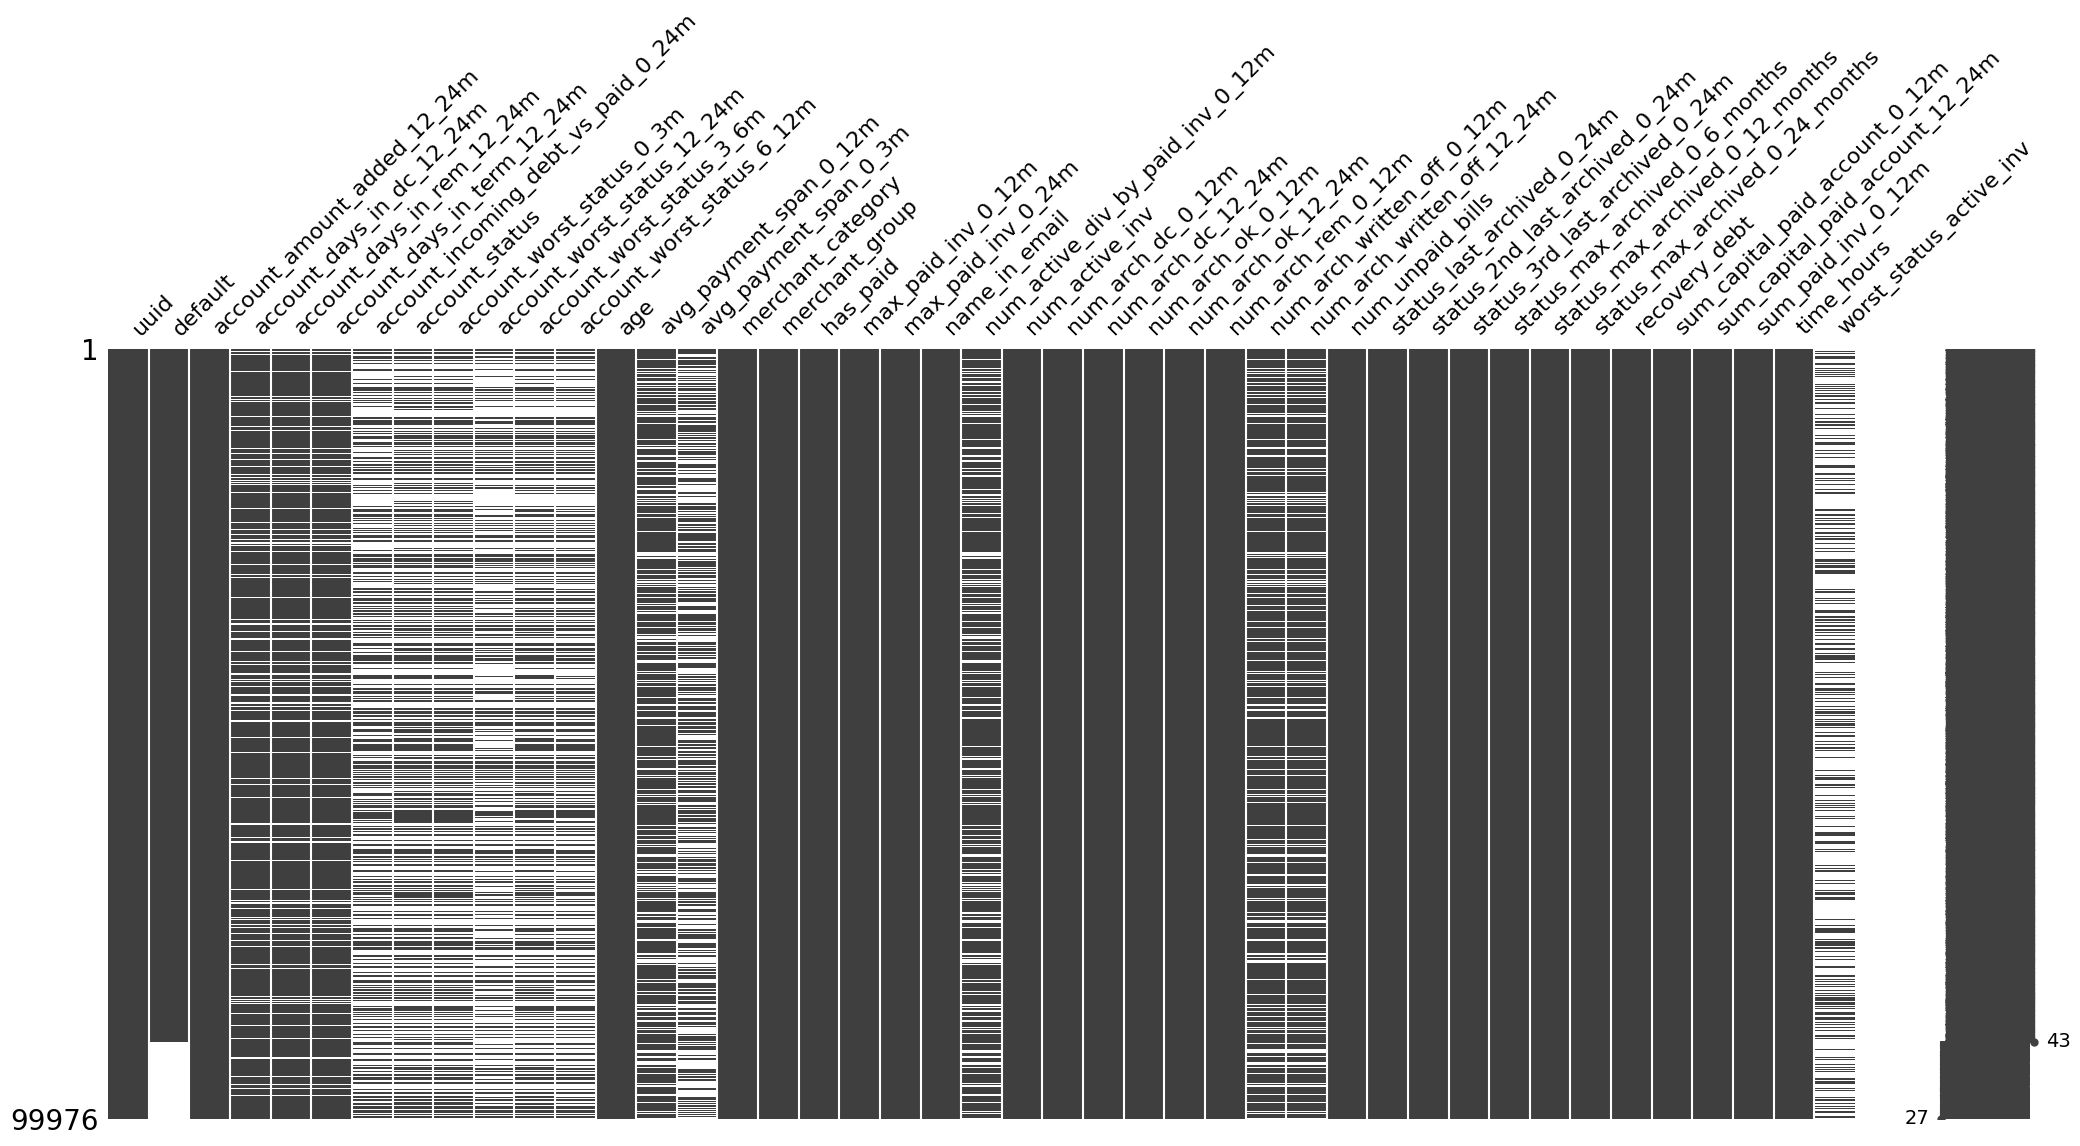

In [ ]:
msno.matrix(data)

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)
print("-------------------------------------")

                                                             column_name  \
uuid                                                                uuid   
default                                                          default   
account_amount_added_12_24m                  account_amount_added_12_24m   
account_days_in_dc_12_24m                      account_days_in_dc_12_24m   
account_days_in_rem_12_24m                    account_days_in_rem_12_24m   
account_days_in_term_12_24m                  account_days_in_term_12_24m   
account_incoming_debt_vs_paid_0_24m  account_incoming_debt_vs_paid_0_24m   
account_status                                            account_status   
account_worst_status_0_3m                      account_worst_status_0_3m   
account_worst_status_12_24m                  account_worst_status_12_24m   
account_worst_status_3_6m                      account_worst_status_3_6m   
account_worst_status_6_12m                    account_worst_status_6_12m   
age         

In [ ]:
missing_value_df = missing_value_df[(missing_value_df['percent_missing'] >= 30)]
missing_values = missing_value_df['column_name'].tolist()
missing_values

['account_incoming_debt_vs_paid_0_24m',
 'account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'avg_payment_span_0_3m',
 'worst_status_active_inv']

In [ ]:
data = data.drop(columns=missing_values,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   uuid                              99976 non-null  object  
 1   default                           89976 non-null  category
 2   account_amount_added_12_24m       99976 non-null  int64   
 3   account_days_in_dc_12_24m         88140 non-null  float64 
 4   account_days_in_rem_12_24m        88140 non-null  float64 
 5   account_days_in_term_12_24m       88140 non-null  float64 
 6   age                               99976 non-null  int64   
 7   avg_payment_span_0_12m            76140 non-null  float64 
 8   merchant_category                 99976 non-null  category
 9   merchant_group                    99976 non-null  category
 10  has_paid                          99976 non-null  bool    
 11  max_paid_inv_0_12m                99976 non-null  floa

In [ ]:
predict_data = data[pd.isnull(data.default)]
predict_data.shape
data.drop(data[pd.isnull(data.default)].index, axis=0, inplace=True)

In [ ]:
fig = px.pie(values = data["merchant_group"].value_counts(), names= data["merchant_group"].unique(), title= "Merchant groups value count")

fig.show()

In [ ]:
# Fill missing values in numeric columns using interpolation
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].interpolate(method='linear')
predict_data[numerical_cols] = predict_data[numerical_cols].interpolate(method="linear")

# Fill missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(include='category').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
predict_data[categorical_cols] = predict_data[categorical_cols].fillna(predict_data[categorical_cols].mode().iloc[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89976 entries, 0 to 89975
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   uuid                              89976 non-null  object  
 1   default                           89976 non-null  category
 2   account_amount_added_12_24m       89976 non-null  int64   
 3   account_days_in_dc_12_24m         89976 non-null  float64 
 4   account_days_in_rem_12_24m        89976 non-null  float64 
 5   account_days_in_term_12_24m       89976 non-null  float64 
 6   age                               89976 non-null  int64   
 7   avg_payment_span_0_12m            89976 non-null  float64 
 8   merchant_category                 89976 non-null  category
 9   merchant_group                    89976 non-null  category
 10  has_paid                          89976 non-null  bool    
 11  max_paid_inv_0_12m                89976 non-null  floa

<ipython-input-18-73982d3b934c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-73982d3b934c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As we can see, after missing value handling there is not any empty or nan values.

<Axes: >

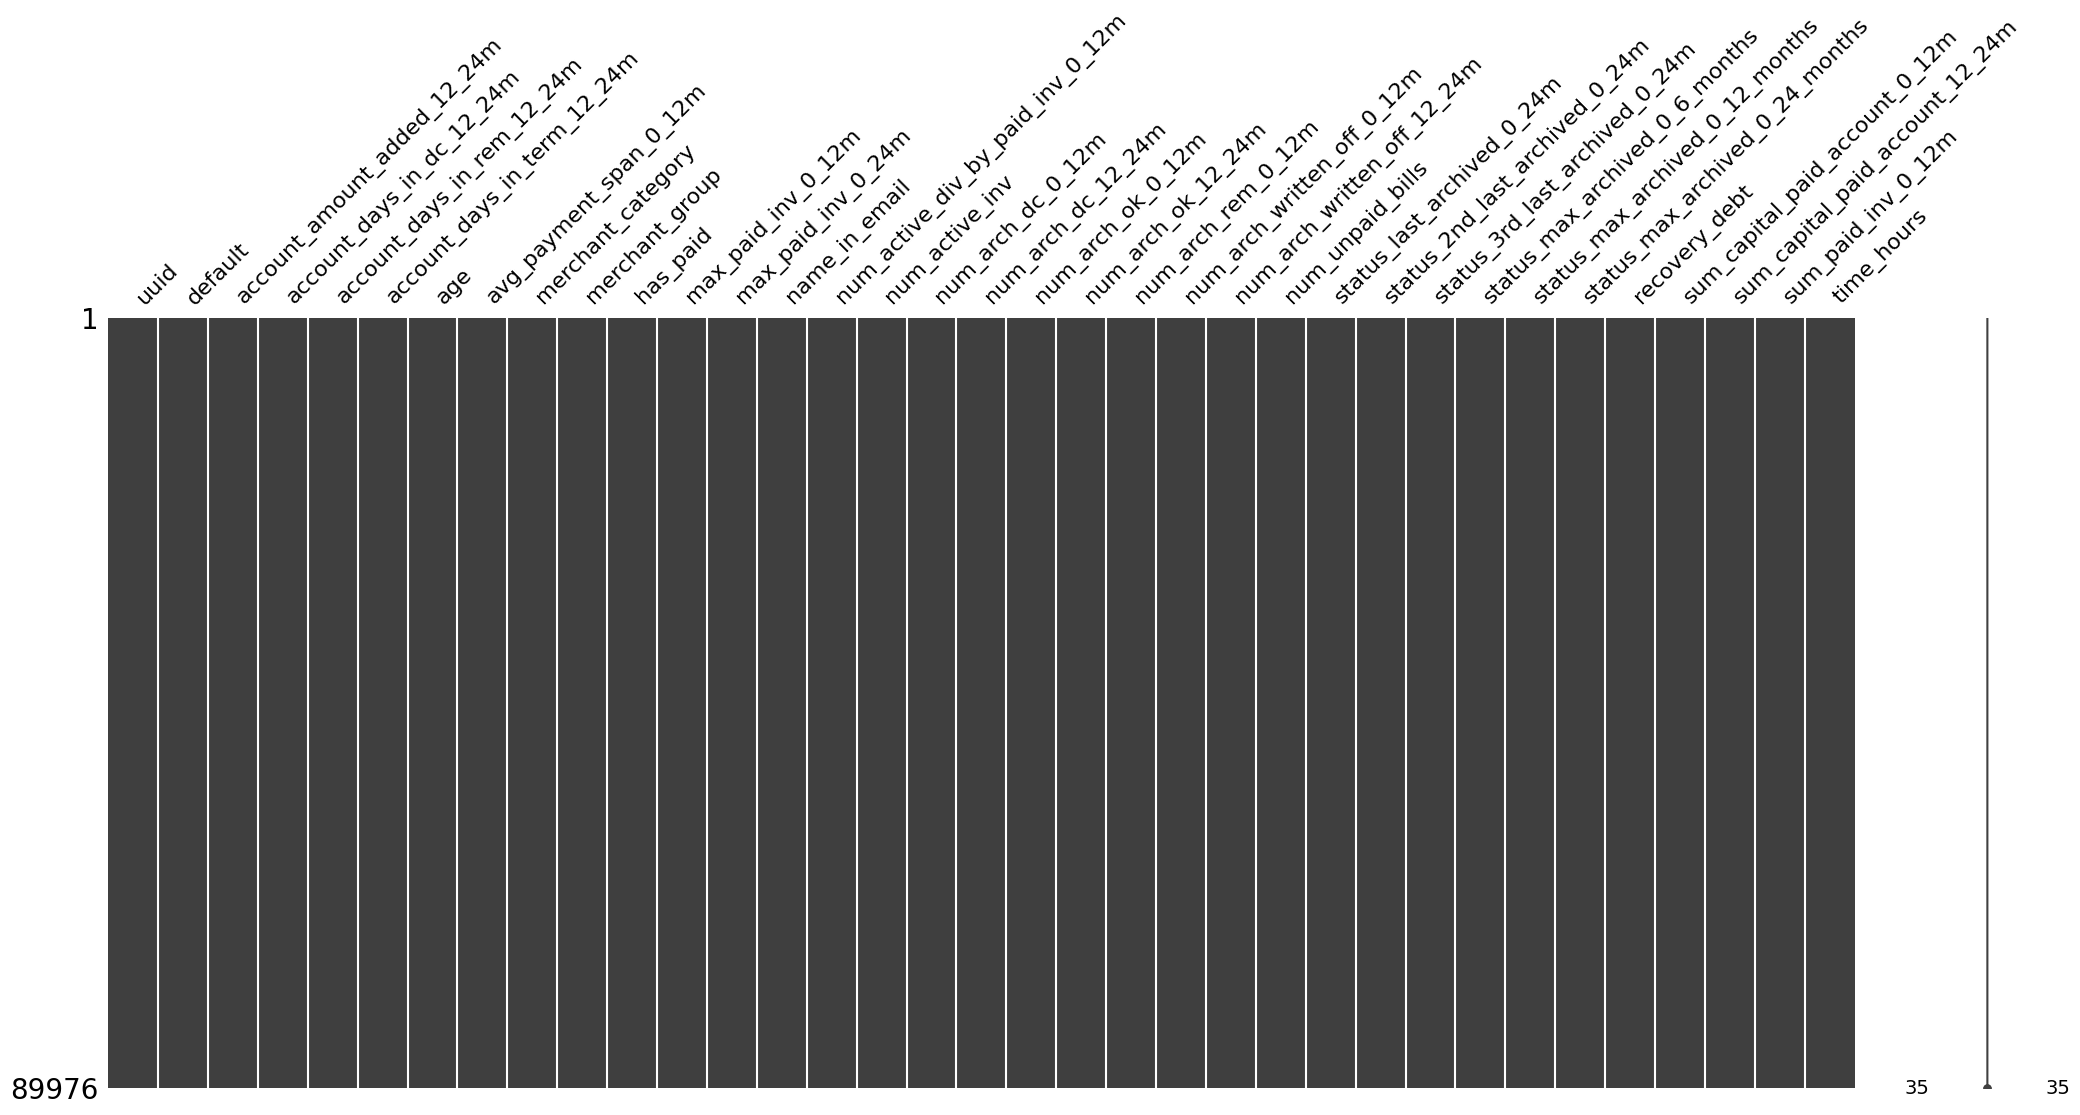

In [ ]:
msno.matrix(data)

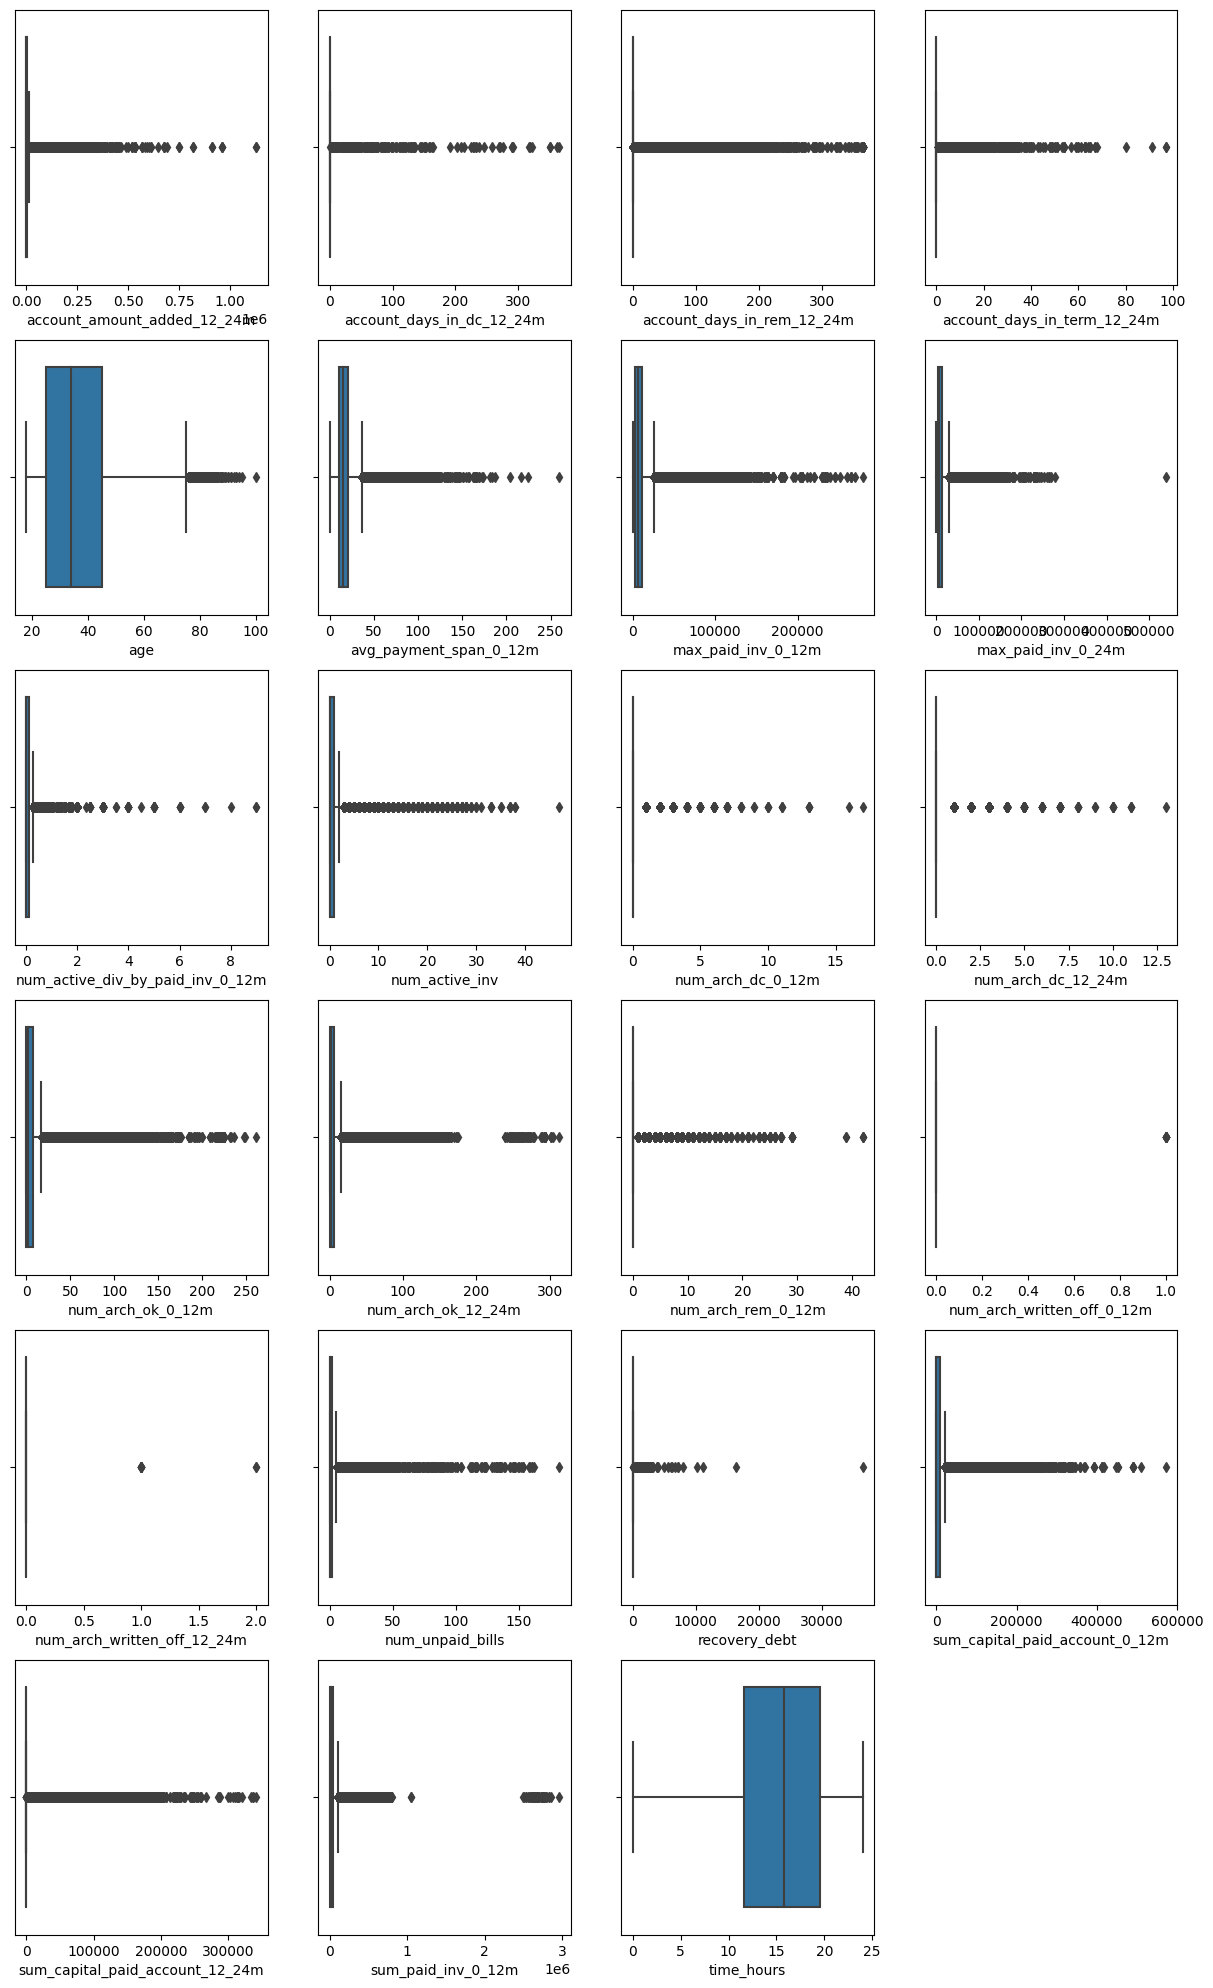

In [ ]:
fig = plt.figure(figsize = (15,25))
for i, v in enumerate(data.select_dtypes(include=np.number)):
    ax = fig.add_subplot(6,4, i+1)
    sns.boxplot(x = df[v], ax = ax)

# Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) is an algorithm used for outlier detection in data mining and machine learning. It is a non-parametric method that measures the local deviation of a data point with respect to its neighbors. The LOF algorithm is based on the idea that outliers are often located in regions of lower density compared to their neighbors.

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(data.select_dtypes(include=np.number))

lof_scores = -clf.negative_outlier_factor_
threshold = np.percentile(lof_scores, 85)
data = data[~(lof_scores > threshold)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76479 entries, 0 to 89974
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   uuid                              76479 non-null  object  
 1   default                           76479 non-null  category
 2   account_amount_added_12_24m       76479 non-null  int64   
 3   account_days_in_dc_12_24m         76479 non-null  float64 
 4   account_days_in_rem_12_24m        76479 non-null  float64 
 5   account_days_in_term_12_24m       76479 non-null  float64 
 6   age                               76479 non-null  int64   
 7   avg_payment_span_0_12m            76479 non-null  float64 
 8   merchant_category                 76479 non-null  category
 9   merchant_group                    76479 non-null  category
 10  has_paid                          76479 non-null  bool    
 11  max_paid_inv_0_12m                76479 non-null  floa

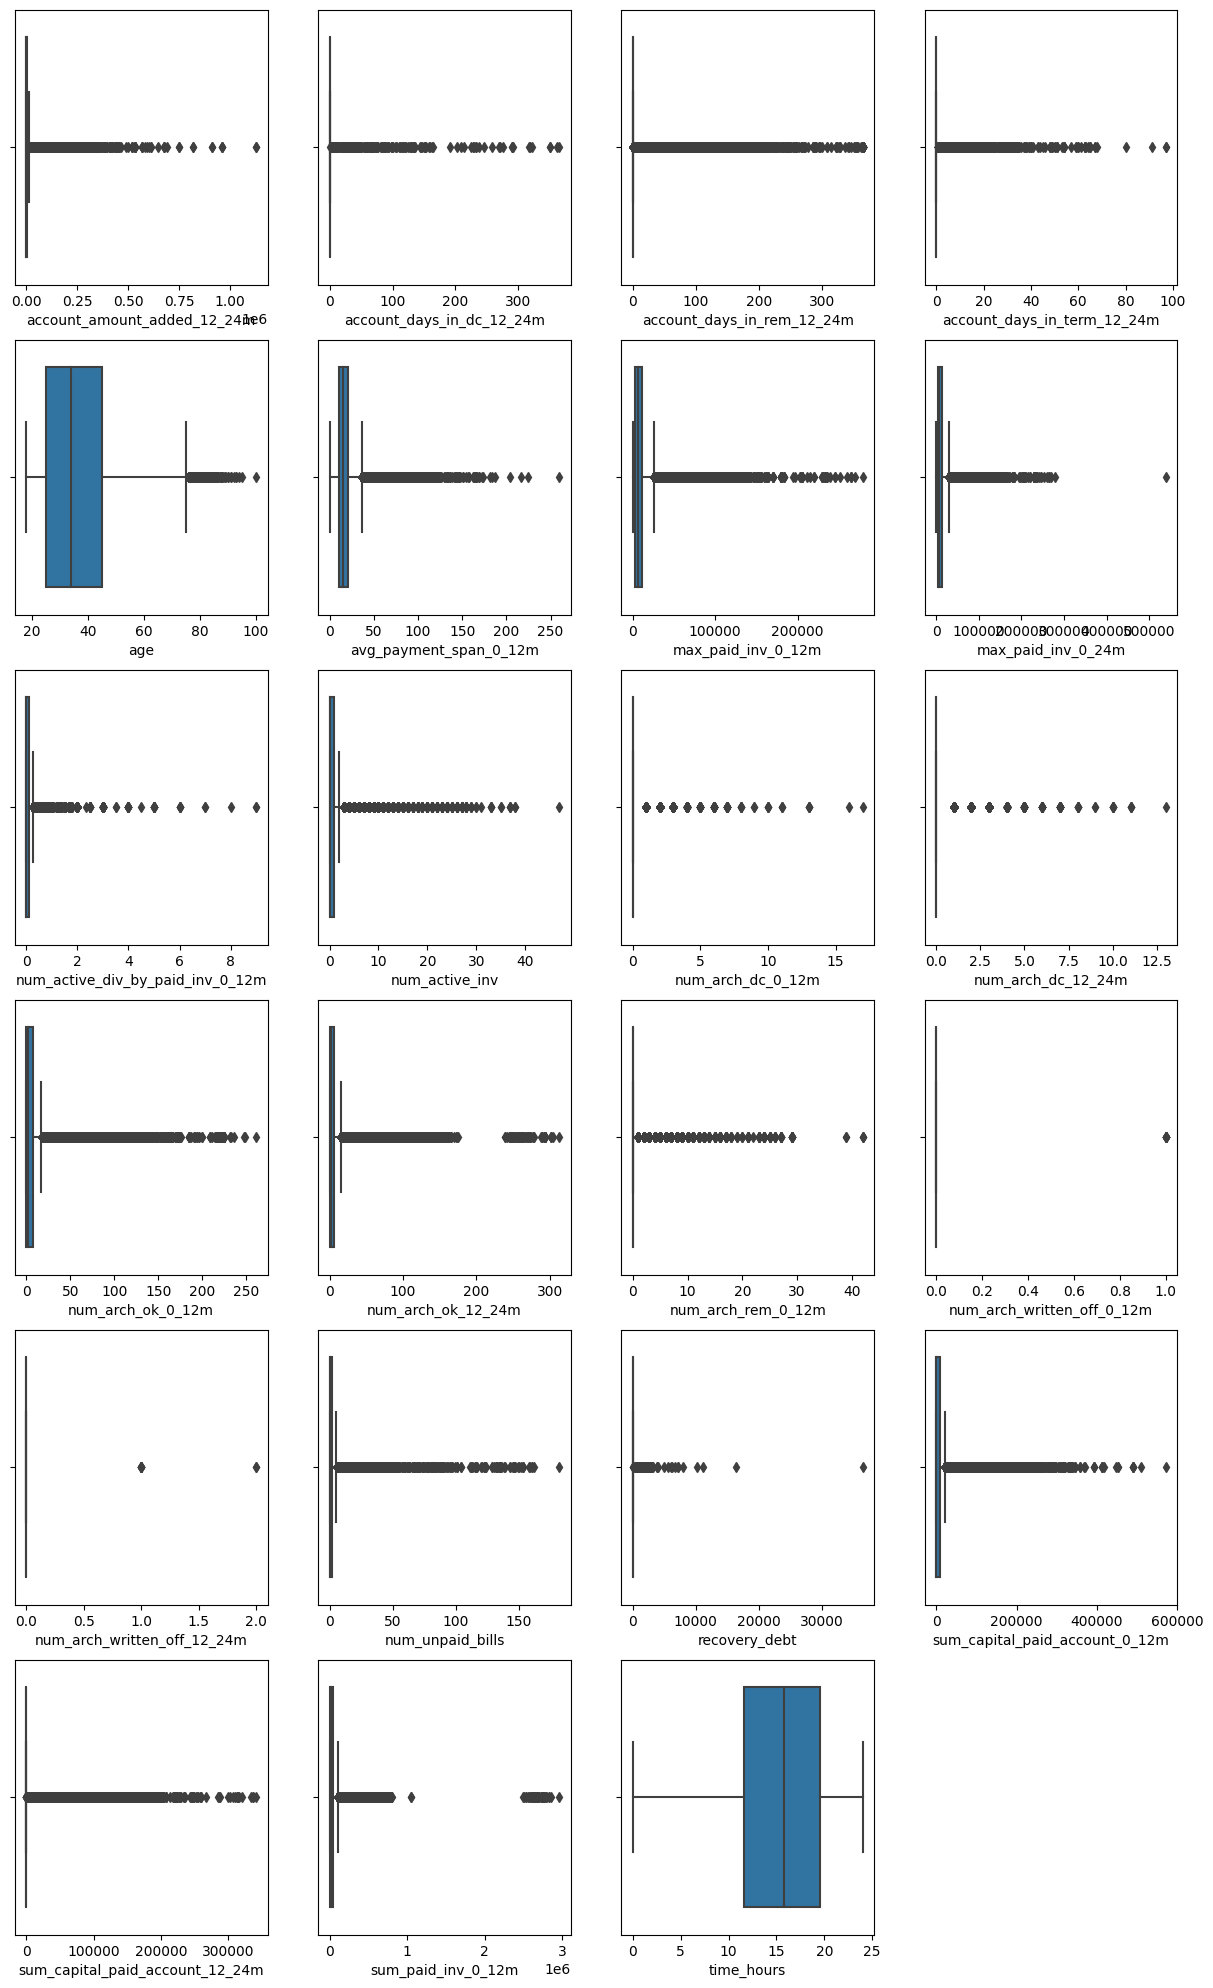

In [ ]:
fig = plt.figure(figsize = (15,25))
for i, v in enumerate(data.select_dtypes(include=np.number)):
    ax = fig.add_subplot(6,4, i+1)
    sns.boxplot(x = df[v], ax = ax)

In [ ]:
categorical_features = ['merchant_category', 'merchant_group',"name_in_email"]
print(categorical_features)
data = pd.get_dummies(data, columns = categorical_features)
predict_data = pd.get_dummies(predict_data, columns = categorical_features)
data.head()

['merchant_category', 'merchant_group', 'name_in_email']


,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,has_paid,max_paid_inv_0_12m,...,merchant_group_Jewelry & Accessories,"merchant_group_Leisure, Sport & Hobby",name_in_email_F,name_in_email_F+L,name_in_email_F1+L,name_in_email_Initials,name_in_email_L,name_in_email_L1+F,name_in_email_Nick,name_in_email_no_match
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,20,12.692308,True,31638.0,...,0,0,0,0,0,0,0,0,0,1
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,50,25.833333,True,13749.0,...,0,0,0,1,0,0,0,0,0,0
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,22,20.000000,True,29890.0,...,0,0,0,0,0,0,0,1,0,0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,0.0,0.0,0.0,36,4.687500,True,40040.0,...,0,0,0,0,1,0,0,0,0,0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,25,13.000000,True,7100.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_amount_added_12_24m,76479.0,12113.544215,32920.405591,0.0,0.0,0.0,5199.0,751971.0
account_days_in_dc_12_24m,76479.0,0.207460,5.344911,0.0,0.0,0.0,0.0,362.0
account_days_in_rem_12_24m,76479.0,4.947160,21.319759,0.0,0.0,0.0,0.0,365.0
account_days_in_term_12_24m,76479.0,0.268902,2.767231,0.0,0.0,0.0,0.0,97.0
age,76479.0,36.008630,12.979582,18.0,25.0,34.0,45.0,89.0
...,...,...,...,...,...,...,...,...
name_in_email_Initials,76479.0,0.000235,0.015340,0.0,0.0,0.0,0.0,1.0
name_in_email_L,76479.0,0.013442,0.115157,0.0,0.0,0.0,0.0,1.0
name_in_email_L1+F,76479.0,0.160279,0.366867,0.0,0.0,0.0,0.0,1.0
name_in_email_Nick,76479.0,0.082768,0.275533,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = data.drop(["default", "uuid"], axis=1)
Y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Random Forest

In [ ]:
rf_params = {
    "max_depth" : [5,15,20,30,35,40,45,50],
    "max_features": [0.2,0.7,0.4,0.3,1,0.5],
    "n_estimators": [100,300,500,1000,700],
    "min_samples_split": [2,5,8,10,12,15],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
    "max_samples": [0.2, 0.5,0.4, 0.7, 1]
}
rf_model = RandomForestClassifier(random_state = 42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, n_jobs = -1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)
joblib.dump(random_search, "./random_forest.joblib")

'rf_params = {\n    "max_depth" : [5,15,20,30,35,40,45,50],\n    "max_features": [0.2,0.7,0.4,0.3,1,0.5],\n    "n_estimators": [100,300,500,1000,700],\n    "min_samples_split": [2,5,8,10,12,15],\n    "min_samples_leaf": [1,2,3,4,5,6,7,8,9],\n    "max_samples": [0.2, 0.5,0.4, 0.7, 1]\n}\nrf_model = RandomForestClassifier(random_state = 42)\nrandom_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, n_jobs = -1)\nrandom_search.fit(X_train, y_train)\nbest_params = random_search.best_params_\nbest_score = random_search.best_score_\nprint(best_params)\nprint(best_score)\njoblib.dump(random_search, "./random_forest.joblib")'

In [ ]:
random_forest = joblib.load("./random_forest.joblib")

In [ ]:
predict_data.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,has_paid,max_paid_inv_0_12m,...,merchant_group_Jewelry & Accessories,"merchant_group_Leisure, Sport & Hobby",name_in_email_F,name_in_email_F+L,name_in_email_F1+L,name_in_email_Initials,name_in_email_L,name_in_email_L1+F,name_in_email_Nick,name_in_email_no_match
89976,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,NaN,0,0.0,0.0,0.0,20,6.400000,True,7225.0,...,0,0,1,0,0,0,0,0,0,0
89977,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,NaN,0,0.0,0.0,0.0,64,9.450000,False,0.0,...,0,0,0,0,0,0,0,1,0,0
89978,e9c39869-1bc5-4375-b627-a2df70b445ea,NaN,50956,0.0,77.0,0.0,28,12.500000,True,91980.0,...,0,0,1,0,0,0,0,0,0,0
89979,6beb88a3-9641-4381-beb6-c9a208664dd0,NaN,35054,0.0,0.0,0.0,31,41.000000,True,1790.0,...,0,1,0,1,0,0,0,0,0,0
89980,bb89b735-72fe-42a4-ba06-d63be0f4ca36,NaN,0,0.0,0.0,0.0,30,33.666667,True,0.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
predictValues = predict_data.iloc[:,2:]
predictValues.head(1)

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_div_by_paid_inv_0_12m,...,merchant_group_Jewelry & Accessories,"merchant_group_Leisure, Sport & Hobby",name_in_email_F,name_in_email_F+L,name_in_email_F1+L,name_in_email_Initials,name_in_email_L,name_in_email_L1+F,name_in_email_Nick,name_in_email_no_match
89976,0,0.0,0.0,0.0,20,6.4,True,7225.0,7225.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
prediction = random_forest.predict(predictValues)
predict_proba = random_forest.predict_proba(predictValues)

In [ ]:
result = pd.DataFrame()
result["UUID"] = predict_data["uuid"]
result["prediction"] = prediction
result["prob"] = predict_proba[:,1]

In [ ]:
result.head()

,UUID,prediction,prob
89976,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,0.0,0.002437
89977,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,0.0,0.009366
89978,e9c39869-1bc5-4375-b627-a2df70b445ea,0.0,0.004229
89979,6beb88a3-9641-4381-beb6-c9a208664dd0,0.0,0.070884
89980,bb89b735-72fe-42a4-ba06-d63be0f4ca36,0.0,0.021934


In [ ]:
result.to_csv("results.csv")